<a href="https://colab.research.google.com/github/Erike-Simon/lab-natty-or-not-nexa/blob/main/PetIsco_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CESAR School**

**Disciplina:** *Inovação Tecnológica*

**Aluno:** *Erike Simon, Breno Araújo, Filipe Pontes, Lucas Cristiano, Thiago Tenório e Yaci Ribeiro.*


## Configurações

In [ ]:
from google.colab import drive
import pandas as pd

# Monta o Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Caminho para o arquivo CSV no Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/inovacao-tecnologica/data/datapet1.csv'

# Leia o arquivo CSV usando pandas
df = pd.read_csv(file_path)

# Exiba as primeiras linhas do DataFrame para verificar
df.head(32)

,data,qtd_avulso,qtd_ass_mensal,qtd_churn_ass_mensal,qtd_acumulada_ass_mensal,qtd_ass_tri,qtd_churn_ass_tri,qtd_acumulada_ass_tri,faturamento,custo,custo_marketing
0,01-01-2021,6,1,0,0,1,0,0,77.4,53.728794,2.981580
1,02-01-2021,19,1,0,1,0,0,0,575.0,267.035041,25.150481
2,03-01-2021,14,0,0,1,2,0,2,1070.3,449.708223,30.196326
3,04-01-2021,10,2,0,3,1,0,3,1958.4,1132.844732,95.378170
4,05-01-2021,7,1,0,4,1,0,4,2529.5,1572.488978,80.617469
5,06-01-2021,20,0,0,4,1,0,5,2977.1,1219.816215,103.077330
6,07-01-2021,6,0,0,4,0,0,5,2796.5,1671.231163,109.975476
7,08-01-2021,18,1,0,5,0,0,5,3281.2,1836.446831,96.940597
8,09-01-2021,10,2,0,7,1,0,6,4117.7,1774.644298,142.842252
9,10-01-2021,10,0,0,7,0,0,6,4117.7,1860.200470,115.407192


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df mensal

In [ ]:
# Cria um DataFrame
df = pd.DataFrame(df)

# Converte a coluna 'data' para o formato datetime
df['data'] = pd.to_datetime(df['data'], format='%d-%m-%Y')

# Agrupa os dados por mês, excluindo a coluna de data da soma
df['mes_ano'] = df['data'].dt.to_period('M')
df_mensal = df.groupby('mes_ano').agg({
    'qtd_ass_mensal': 'sum',
    'qtd_ass_tri': 'sum',
    'qtd_avulso': 'sum',
    'faturamento': 'sum',
    'custo': 'sum',
    'custo_marketing': 'sum',
    'qtd_acumulada_ass_mensal': 'max',
    'qtd_acumulada_ass_tri': 'max'
}).reset_index()


# Converte a coluna 'mes_ano' para string para exibição no gráfico
df_mensal['mes_ano'] = df_mensal['mes_ano'].astype(str)

In [ ]:
df_mensal.head()

,mes_ano,qtd_ass_mensal,qtd_ass_tri,qtd_avulso,faturamento,custo,custo_marketing,qtd_acumulada_ass_mensal,qtd_acumulada_ass_tri
0,2021-01,28,24,348,219269.2,1.203189e+05,8554.399426,27,23
1,2021-02,28,31,276,707370.6,3.892482e+05,30494.267097,55,54
2,2021-03,31,28,313,1342019.8,7.141035e+05,56406.767749,86,82
3,2021-04,31,29,185,1815223.4,1.052316e+06,78523.873264,117,111
4,2021-05,24,28,327,2417827.3,1.316161e+06,97121.753374,141,139


In [ ]:
df_mensal.describe()

,qtd_ass_mensal,qtd_ass_tri,qtd_avulso,faturamento,custo,custo_marketing,qtd_acumulada_ass_mensal,qtd_acumulada_ass_tri
count,36.000000,36.000000,36.000000,3.600000e+01,3.600000e+01,36.000000,36.000000,36.000000
mean,29.555556,29.583333,296.972222,9.742921e+06,5.331316e+06,399865.003828,534.250000,543.916667
std,4.866471,4.531635,40.647956,5.749837e+06,3.148446e+06,237738.786393,309.263214,308.532506
min,20.000000,19.000000,185.000000,2.192692e+05,1.203189e+05,8554.399426,27.000000,23.000000
25%,27.000000,26.750000,275.000000,5.002796e+06,2.776413e+06,206689.344775,270.500000,291.500000
50%,29.000000,29.000000,293.000000,9.791130e+06,5.426238e+06,403712.350358,536.500000,549.000000
75%,32.000000,33.000000,316.500000,1.459697e+07,8.214246e+06,594924.115537,791.750000,791.000000
max,46.000000,38.000000,400.000000,1.959748e+07,1.064166e+07,827785.974578,1057.000000,1059.000000


df anual

In [ ]:
# Agrupa os dados por ano, excluindo a coluna de data da soma
df['ano'] = df['data'].dt.year
df_anual = df.groupby('ano').agg({
    'qtd_ass_mensal': 'sum',
    'qtd_ass_tri': 'sum',
    'qtd_avulso': 'sum',
    'faturamento': 'sum',
    'custo': 'sum',
    'custo_marketing': 'sum',
    'qtd_acumulada_ass_mensal': 'max',
    'qtd_acumulada_ass_tri': 'max'
}).reset_index()

# Converte a coluna 'mes_ano' para string para exibição no gráfico
df_anual['ano'] = df_anual['ano'].astype(str)

In [ ]:
df_anual.head()

,ano,qtd_ass_mensal,qtd_ass_tri,qtd_avulso,faturamento,custo,custo_marketing,qtd_acumulada_ass_mensal,qtd_acumulada_ass_tri
0,2021,339,366,3444,38550583.9,2.104012e+07,1.580507e+06,338,365
1,2022,367,344,3684,117340674.4,6.387536e+07,4.774034e+06,705,709
2,2023,358,355,3563,194853890.9,1.070119e+08,8.040599e+06,1057,1059


In [ ]:
df_anual.describe()

,qtd_ass_mensal,qtd_ass_tri,qtd_avulso,faturamento,custo,custo_marketing,qtd_acumulada_ass_mensal,qtd_acumulada_ass_tri
count,3.000000,3.0,3.000000,3.000000e+00,3.000000e+00,3.000000e+00,3.000000,3.000000
mean,354.666667,355.0,3563.666667,1.169150e+08,6.397579e+07,4.798380e+06,700.000000,711.000000
std,14.294521,11.0,120.001389,7.815252e+07,4.298598e+07,3.230115e+06,359.526077,347.004323
min,339.000000,344.0,3444.000000,3.855058e+07,2.104012e+07,1.580507e+06,338.000000,365.000000
25%,348.500000,349.5,3503.500000,7.794563e+07,4.245774e+07,3.177270e+06,521.500000,537.000000
50%,358.000000,355.0,3563.000000,1.173407e+08,6.387536e+07,4.774034e+06,705.000000,709.000000
75%,362.500000,360.5,3623.500000,1.560973e+08,8.544363e+07,6.407317e+06,881.000000,884.000000
max,367.000000,366.0,3684.000000,1.948539e+08,1.070119e+08,8.040599e+06,1057.000000,1059.000000


## Gráficos

### Produtos adquiridos (jan 2021 - dez 2023)

In [ ]:
import plotly.express as px

fig = px.bar(df_mensal, x="mes_ano",
             y=["qtd_avulso", "qtd_ass_mensal", "qtd_ass_tri"],
             title="Produtos Adquiridos (jan 2021 - dez 2023)",
             labels={"mes_ano": "Meses",
                     "value": "Quantidade"},
             color_discrete_map={"qtd_avulso": "#00CC96",
                                 "qtd_ass_mensal": "#AB63FA",
                                 "qtd_ass_tri": "#FFA15A"})

fig.update_layout(xaxis_title="Mês e Ano", yaxis_title="Quantidade de Produtos")

fig.show()

Quantidade de produtos (novas assinaturas ou pacotes) adquiridos ao longo dos meses dos anos de 2021 até final de 2023.

### Faturamento Mensal (jan 2021 - dez 2023)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go


fig1 = px.bar(df_mensal, x="mes_ano",
             y="faturamento",
             title="Faturamento Mensal (jan 2021 - dez 2023)",
             color_discrete_sequence=['#AB63FA'])

fig1.update_layout(xaxis_title="Mês e Ano", yaxis_title="Faturamento (R$)")

# Adicionando a linha de tendência
fig1.add_trace(go.Scatter(x=df_mensal["mes_ano"],
                         y=df_mensal["faturamento"],
                         mode='lines',
                         name='Crescimento',
                         line=dict(color='#3CB371', width=3)))  # Cor verde

fig1.show()

### Faturamento Anual (2021 - 2023)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# ... (Seu código para gerar o DataFrame df_anual) ...

fig2 = px.bar(df_anual, x="ano",
             y="faturamento",
             title="Faturamento Anual (2021 - 2023)",
             color_discrete_sequence=['#AB63FA'],
             barmode='group') # Define o espaçamento entre grupos de barras

fig2.update_layout(xaxis_title="Mês e Ano", yaxis_title="Faturamento (R$)",
                  width=1000, height=500) # Define a largura e altura do gráfico

# Adicionando a linha de tendência
fig2.add_trace(go.Scatter(x=df_anual["ano"],
                         y=df_anual["faturamento"],
                         mode='lines',
                         name='Crescimento',
                         line=dict(color='#3CB371', width=3)))  # Cor verde

fig2.show()

### Faturamento X Custos de Produção (jan 2021 - dez 2023)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_mensal['mes_ano'],
    y=df_mensal['faturamento'],
    name='Faturamento',
    marker_color='#00CC96'
))

fig.add_trace(go.Bar(
    x=df_mensal['mes_ano'],
    y=df_mensal['custo'],
    name='Custos de Produção',
    marker_color='#EF553B'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45, # Ângulo de rotação dos rótulos do eixo x
    xaxis_title="Mês e Ano", # Título do eixo x
    yaxis_title="Valor (R$)", # Título do eixo y
    title="Faturamento X Custos de Produção (jan 2021 - dez 2023)" # Título do gráfico
)
fig.show()


### Investimento em anuncio em geral X qtd aquisição de clientes [assinatua e pacotes] (mensal)

In [ ]:
# Calcula o aumento de faturamento de um mês para o próximo
df_mensal['aumento_faturamento'] = df_mensal['faturamento'].diff()

In [ ]:
# Define as cores das barras com base no valor do aumento de faturamento
colors = ['#FF6347' if val < 0 else '#3CB371' for val in df_mensal['aumento_faturamento']]

# Cria o gráfico de barras
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_mensal['mes_ano'],
    y=df_mensal['custo_marketing'],
    name='Custos com Marketing',
    marker_color='#AB63FA'
))

fig.add_trace(go.Bar(
    x=df_mensal['mes_ano'],
    y=df_mensal['aumento_faturamento'],
    name='Aumento de Faturamento',
    marker_color=colors
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45, # Ângulo de rotação dos rótulos do eixo x
    xaxis_title="Mês e Ano", # Título do eixo x
    yaxis_title="Valor (R$)", # Título do eixo y
    title="Aumento de Faturamento X Investimentos em Marketing (jan 2021 - dez 2023)" # Título do gráfico
)
fig.show()

## testes

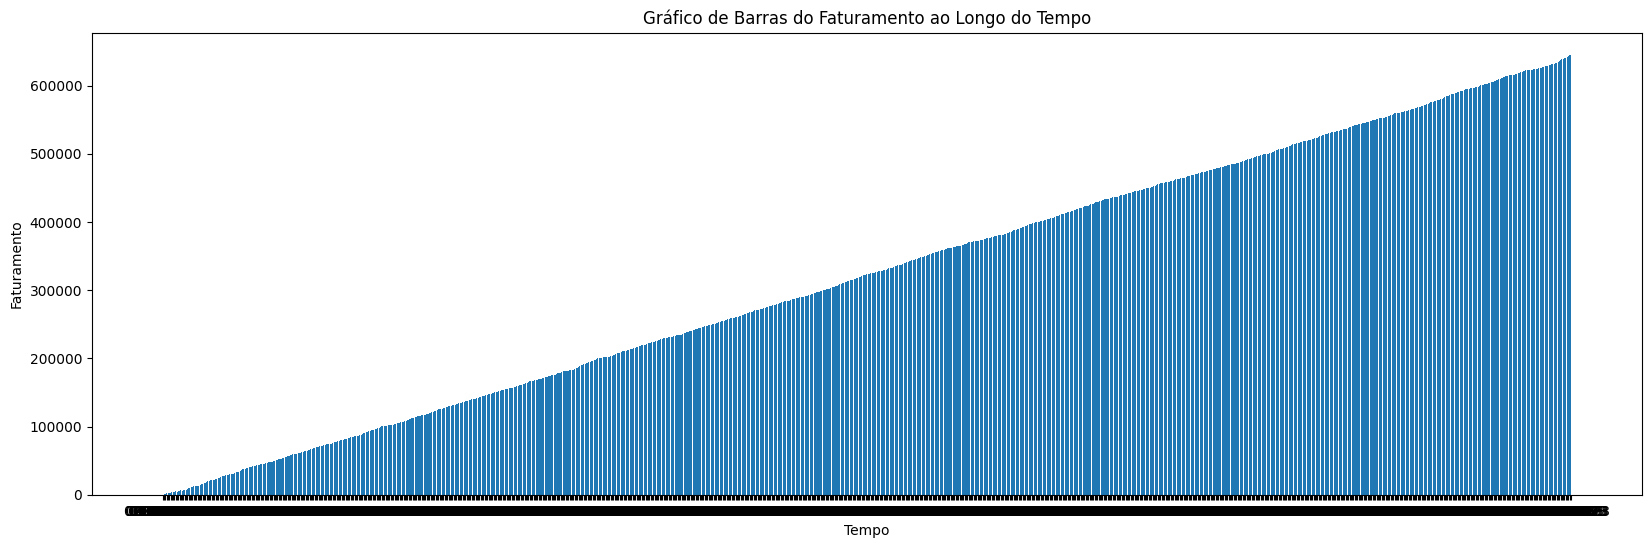

In [ ]:

plt.figure(figsize=(20, 6))  # Define a largura e a altura da figura

plt.bar(df['data'], df['faturamento'])
plt.xlabel('Tempo')
plt.ylabel('Faturamento')
plt.title('Gráfico de Barras do Faturamento ao Longo do Tempo')
plt.show()

In [ ]:
import pandas as pd
import random

# Define a data inicial e final
data_inicial = '01-01-2021'
data_final = '31-12-2023'

# Cria uma lista para armazenar os dados
data = []

# Quantidade acumulada de assinantes
qtd_acumulada_ass_mensal = 0
qtd_acumulada_ass_tri = 0

# Loop para gerar os dados para cada dia
for dia in pd.date_range(data_inicial, data_final):
  dia_str = dia.strftime('%d-%m-%Y')

  # Gera valores aleatórios para as quantidades
  qtd_avulso = random.randint(0, 20)

  # Quantidade de assinaturas mensais e trimestrais
  qtd_ass_mensal = random.randint(0, 5)
  qtd_ass_tri = random.randint(0, 5)

  # Verifica se a quantidade total de assinaturas não excede o limite
  while qtd_ass_mensal + qtd_ass_tri > 60:
    qtd_ass_mensal = random.randint(0, 5)
    qtd_ass_tri = random.randint(0, 5)

  # Quantidade de cancelamentos de assinaturas
  qtd_churn_ass_mensal = random.randint(0, 3)
  qtd_churn_ass_tri = random.randint(0, 2)

  # Verifica se a quantidade total de cancelamentos não excede o limite
  while qtd_churn_ass_mensal + qtd_churn_ass_tri > 10:
    qtd_churn_ass_mensal = random.randint(0, 3)
    qtd_churn_ass_tri = random.randint(0, 2)

  # Calcula a quantidade acumulada de assinaturas
  qtd_acumulada_ass_mensal += qtd_ass_mensal
  qtd_acumulada_ass_mensal -= qtd_churn_ass_mensal

  qtd_acumulada_ass_tri += qtd_ass_tri
  qtd_acumulada_ass_tri -= qtd_churn_ass_tri

  # Calcula o faturamento
  faturamento = (qtd_acumulada_ass_tri * 279.90) + (qtd_acumulada_ass_mensal * 329.90) + (qtd_avulso * 12.90)

  # Calcula o custo de operação
  custo = random.uniform(faturamento * 0.3, faturamento * 0.7)

  # Calcula o custo de marketing
  custo_marketing = random.uniform(custo * 0.05, custo * 0.1)

  # Adiciona os dados à lista
  data.append([dia_str, qtd_avulso, qtd_ass_mensal, qtd_churn_ass_mensal, qtd_acumulada_ass_mensal, qtd_ass_tri, qtd_churn_ass_tri, qtd_acumulada_ass_tri, faturamento, custo, custo_marketing])

# Cria um DataFrame pandas a partir dos dados
df = pd.DataFrame(data, columns=['data', 'qtd_avulso', 'qtd_ass_mensal', 'qtd_churn_ass_mensal', 'qtd_acumulada_ass_mensal', 'qtd_ass_tri', 'qtd_churn_ass_tri', 'qtd_acumulada_ass_tri', 'faturamento', 'custo', 'custo_marketing'])

# Salva o DataFrame em um arquivo .csv
df.to_csv('dados_empresa_alimentos.csv', index=False)

# Imprime mensagem de sucesso
print("Arquivo .csv gerado com sucesso!")

# Calcula as estatísticas por ano
df['ano'] = pd.to_datetime(df['data']).dt.year
estatisticas_anuais = df.groupby('ano').agg({'faturamento': 'sum', 'custo': 'sum', 'custo_marketing': 'sum'})

# Calcula as estatísticas do primeiro mês de cada ano
primeiro_mes_ano = df.groupby(pd.to_datetime(df['data']).dt.year).first()

# Imprime as estatísticas
print("\nEstatísticas Anuais:")
print(estatisticas_anuais)

print("\nEstatísticas do Primeiro Mês de Cada Ano:")
print(primeiro_mes_ano)

Arquivo .csv gerado com sucesso!


ValueError: time data "13-01-2021" doesn't match format "%m-%d-%Y", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.